In [1]:
#### NOTES ####

# 12/22/18 - Combined data from multiple years into one df
# 12/22/18 - Research on how to make histograms for each gender bigger
# 12/22/18 - Research on warning for deprecated 'normed' kwarg in sns.distplot (matplotlib)
# 12/22/18 - Used aspect arg in FacetGrid func to increase size of histograms for gender BMI
# 12/22/18 - Removed separate df's created for male and female, since viz args allow for
#             segmenting on a category like gender


In [2]:
import importlib
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns


import workbench as wp

In [3]:
# Reload workbench module so changes are included
_ = importlib.reload(wp)

In [4]:
# Import demographic data (e.g., gender)
# for each participant
filename = "1999-2000/DEMO.XPT"
demo_2000 = pd.read_sas(filename)
demo_2000.shape

(9965, 144)

In [5]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
demo_2000["SEQN"].is_unique

True

In [6]:
# Import body measurement data
filename = "1999-2000/BMX.XPT"
bmx_2000 = pd.read_sas(filename)
bmx_2000.shape

(9282, 38)

In [7]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
bmx_2000["SEQN"].is_unique

True

In [8]:
# Add bmx info to demo info
combined_2000 = demo_2000.merge(bmx_2000, how="left", on="SEQN")
combined_2000.shape

(9965, 181)

In [9]:
# Verify new column count meets expectations
# Should be number of cols in each dataframe minus 1 for shared col (SEQN)
demo_2000.shape[1] + bmx_2000.shape[1] - 1

181

In [10]:
# Repeat steps with data from survey year 2015-2016

In [11]:
filename = "2015-2016/BMX_I.XPT"
bmx_2016 = pd.read_sas(filename)
bmx_2016.shape

(9544, 26)

In [12]:
bmx_2016["SEQN"].is_unique

True

In [13]:
filename = "2015-2016/DEMO_I.XPT"
demo_2016 = pd.read_sas(filename)
demo_2016.shape

(9971, 47)

In [14]:
demo_2016["SEQN"].is_unique

True

In [15]:
combined_2016 = demo_2016.merge(bmx_2016, how="left", on="SEQN")
combined_2016.shape

(9971, 72)

In [16]:
# Combine 2000 and 2016 data sets

In [17]:
# Add column to each data set so we can later
# identify the year
new_col = "Survey Year"
combined_2000[new_col] = "1999-2000"
combined_2016[new_col] = "2015-2016"

In [18]:
# Combine dfs
# Note: In Pandas 0.23, must explicitly pass a sorting 
# argument in order to avoid a warning (default = None)
# Pass True to sort columns by name
data = pd.concat([combined_2000, combined_2016], sort=True)
data.shape

(19936, 212)

In [19]:
# Will review male and female participants separately
# Review gender entries
df = combined_2000
col = "RIAGENDR"

df[col].value_counts(dropna=False)

2.0    5082
1.0    4883
Name: RIAGENDR, dtype: int64

In [20]:
# Create mapping of gender code to more readable value
# Per codebook 1.0 = male and 2.0 = female
gender_map = {1.0: "Male",
             2.0: "Female",
             np.nan: "Missing"}

In [21]:
# Add column with gender code translation
df = data

new_col = col + "_x"
df[new_col] = df[col].map(gender_map)

In [22]:
print("Participant Counts by Gender")
df.groupby([new_col, "Survey Year"]).size()
#df[new_col].value_counts(dropna=False)

Participant Counts by Gender


RIAGENDR_x  Survey Year
Female      1999-2000      5082
            2015-2016      5079
Male        1999-2000      4883
            2015-2016      4892
dtype: int64

In [23]:
# Create viz's and compute summary stats of bmi measurements

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


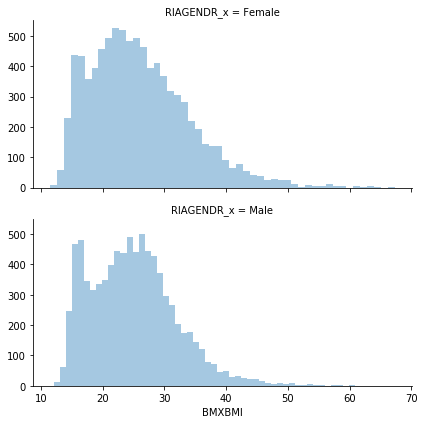

In [73]:
df = data
cat_col = "RIAGENDR" + "_x"
data_col = "BMXBMI"

g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

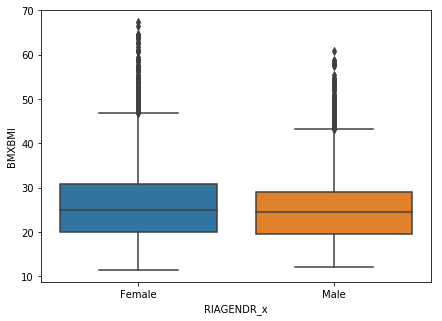

In [25]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [74]:
# Compute summary stats
# Note: Wrapped in df call for display purposes only

print("BMI Summary Stats - All Genders")
pd.DataFrame(df[data_col].describe())

BMI Summary Stats - All Genders


,BMXBMI
count,17218.000000
mean,25.465059
std,7.554681
min,11.490000
25%,19.790000
50%,24.660000
75%,29.800000
max,67.300000


In [27]:
# Segment summary by gender

print("BMI Summary Stats - Male and Female Participants")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Male and Female Participants


RIAGENDR_x,Female,Male
count,8807.000000,8411.000000
mean,26.002057,24.902777
std,8.045325,6.960413
min,11.490000,12.150000
25%,20.000000,19.500000
50%,24.900000,24.470000
75%,30.755000,29.000000
max,67.300000,60.870000


In [28]:
# Explore BMI's between 2000 and 2016 surveys

In [29]:
# Create df's for each gender response

In [30]:
df = data
male_filter = (df["RIAGENDR" + "_x"] == "Male")
female_filter = (df["RIAGENDR" + "_x"] == "Female")

data_male = df[male_filter]
data_female = df[female_filter]

In [31]:
# Gender response = Male

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


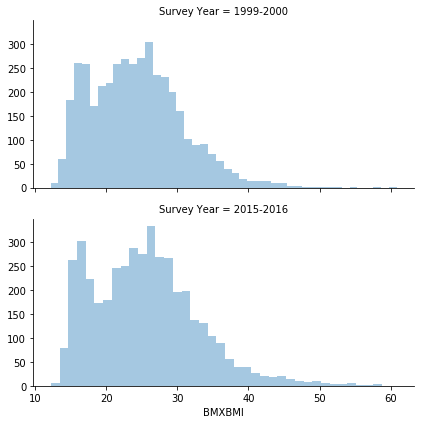

In [32]:
df = data_male
cat_col = "Survey Year"
data_col = "BMXBMI"

g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

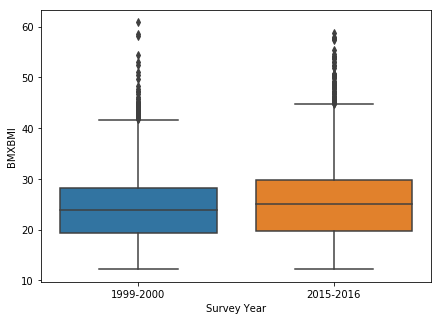

In [33]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [34]:
# Summary stats segmented by survey year

print("BMI Summary Stats - Male")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Male


Survey Year,1999-2000,2015-2016
count,4125.000000,4286.000000
mean,24.309008,25.474242
std,6.476153,7.352205
min,12.150000,12.200000
25%,19.360000,19.700000
50%,23.940000,25.000000
75%,28.280000,29.700000
max,60.870000,58.800000


In [35]:
# Gender response = Female

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


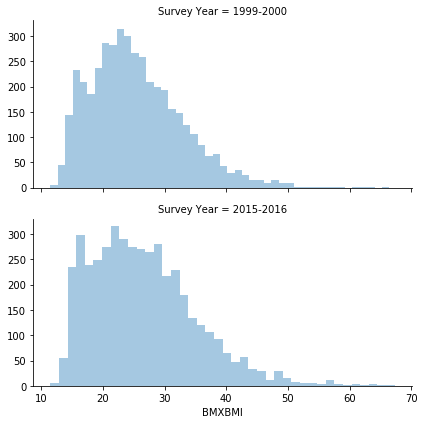

In [36]:
df = data_female
cat_col = "Survey Year"
data_col = "BMXBMI"

#sns.set()
#sns.set_context("talk")
g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

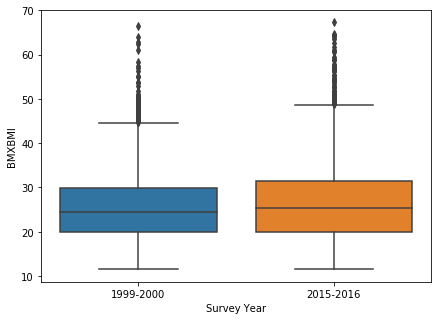

In [37]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [38]:
# Summary stats segmented by survey year

print("BMI Summary Stats - Female")
df.groupby(cat_col).describe()[data_col].T

BMI Summary Stats - Female


Survey Year,1999-2000,2015-2016
count,4337.000000,4470.000000
mean,25.450892,26.536823
std,7.535545,8.477459
min,11.490000,11.500000
25%,19.960000,20.000000
50%,24.370000,25.400000
75%,29.880000,31.500000
max,66.440000,67.300000


In [40]:
df = data
data_segmented_summary_stats = df.groupby(["RIAGENDR" + "_x", "Survey Year"]).describe()[data_col].T
data_segmented_summary_stats

RIAGENDR_x        Female                      Male             
Survey Year    1999-2000    2015-2016    1999-2000    2015-2016
count        4337.000000  4470.000000  4125.000000  4286.000000
mean           25.450892    26.536823    24.309008    25.474242
std             7.535545     8.477459     6.476153     7.352205
min            11.490000    11.500000    12.150000    12.200000
25%            19.960000    20.000000    19.360000    19.700000
50%            24.370000    25.400000    23.940000    25.000000
75%            29.880000    31.500000    28.280000    29.700000
max            66.440000    67.300000    60.870000    58.800000

In [41]:
# Obtain differences between each survey year for each gender

In [42]:
calc_label = "Diff, Y2000 to Y2016"

gen = "Female"

data_segmented_summary_stats.loc[:, (gen, calc_label)] = \
    data_segmented_summary_stats.loc[:, gen].iloc[:, 1] \
    - data_segmented_summary_stats.loc[:, gen].iloc[:, 0]

gen = "Male"

data_segmented_summary_stats.loc[:, (gen, calc_label)] = \
    data_segmented_summary_stats.loc[:, gen].iloc[:, 1] \
    - data_segmented_summary_stats.loc[:, gen].iloc[:, 0]

In [43]:
data_segmented_summary_stats

RIAGENDR_x        Female                      Male               \
Survey Year    1999-2000    2015-2016    1999-2000    2015-2016   
count        4337.000000  4470.000000  4125.000000  4286.000000   
mean           25.450892    26.536823    24.309008    25.474242   
std             7.535545     8.477459     6.476153     7.352205   
min            11.490000    11.500000    12.150000    12.200000   
25%            19.960000    20.000000    19.360000    19.700000   
50%            24.370000    25.400000    23.940000    25.000000   
75%            29.880000    31.500000    28.280000    29.700000   
max            66.440000    67.300000    60.870000    58.800000   

RIAGENDR_x                Female                 Male  
Survey Year Diff, Y2000 to Y2016 Diff, Y2000 to Y2016  
count                 133.000000           161.000000  
mean                    1.085931             1.165233  
std                     0.941914             0.876052  
min                     0.010000             0.050000  
25%                     0.040000             0.340000  
50%                     1.030000             1.060000  
75%                     1.620000             1.420000  
max                     0.860000            -2.070000

In [44]:
#Example to get scalar
#data_segmented_summary_stats.loc["mean", ("Female", "Diff, Y2000 to Y2016")]

In [45]:
# Determine if the differences between the two years is significant

In [46]:
# Start with gender response = Female

# NULL Hypothesis: The BMI of female respondents has not significantly increased between the Y2000 and Y2016 surveys
# Alternate Hypothesis: The BMI of female respondents has significantly increased between the Y2000 and Y2016 surveys

In [54]:
# Create helper functions

In [55]:
def create_df_filter(df, col, filter_value):
    
    return (df[col] == filter_value)

In [56]:
def df_get_values(df, data_col, dropna=True):
    
    if dropna is True:
        df = df.dropna(axis=0, subset=[data_col], how='all')
    
    return list(df[data_col].values)

In [58]:
# Get BMI values for each survey year and gender

df = data
data_col = "BMXBMI"
cat_col = "RIAGENDR" + "_x"
year_col = "Survey Year"

# Create gender filters
female_filter = create_df_filter(df, cat_col, "Female")
male_filter = create_df_filter(df, cat_col, "Male")

# Create survey year filters
survey_year_list = ["1999-2000", "2015-2016"]
year_filter_dict = {
                    survey_year: create_df_filter(
                                df, year_col, survey_year
                                ) for survey_year in survey_year_list}



# Filter overall df and then store values for each gender and survey year

# Create dictionary to store data sets
data_sets_dict = {}

female_2000_df = df[female_filter & year_filter_dict.get("1999-2000")]
female_2000_bmi = df_get_values(female_2000_df, data_col)
data_sets_dict["Female_1999-2000"] = female_2000_bmi

female_2016_df = df[female_filter & year_filter_dict.get("2015-2016")]
female_2016_bmi = df_get_values(female_2016_df, data_col)
data_sets_dict["Female_2015-2016"] = female_2016_bmi

male_2000_df = df[male_filter & year_filter_dict.get("1999-2000")]
male_2000_bmi = df_get_values(male_2000_df, data_col)
data_sets_dict["Male_1999-2000"] = male_2000_bmi

male_2016_df = df[male_filter & year_filter_dict.get("2015-2016")]
male_2016_bmi = df_get_values(male_2016_df, data_col)
data_sets_dict["Male_2015-2016"] = male_2016_bmi

In [59]:
# Store data in variables to be able to run tests

# Note: For these tests making later year first set so difference
# between means is poz if mean is greater

a = data_sets_dict["Female_2015-2016"]
b = data_sets_dict["Female_1999-2000"]

c = data_sets_dict["Male_2015-2016"]
d = data_sets_dict["Male_1999-2000"]

In [ ]:
# To compare means for 2016 and 2000 for each gender,
# can run a t-test for two independent samples
# Note: There is no indication in the NHANES description
# that respondents are re-sampled across survey years

# Must test assumptions to run a t-test:
# - equal variances (will determine type of test)
# - normality

In [63]:
#Run Levene's test on data to test for equal variances

# H0 = The variances are equal
# H1 = The variances are not equal
print("Leven's test for equal variances - Female (Y2016 and 2000)")
stat, p = stats.levene(a, b)
print("Test statistic: {} (p-value: {})".format(stat, p))
print("\n")

print("Leven's test for equal variances - Male (Y2016 and 2000)")
stat, p = stats.levene(c, d)
print("Test statistic: {} (p-value: {})".format(stat, p))

Leven's test for equal variances - Female (Y2016 and 2000)
Test statistic: 55.87909785828652 (p-value: 8.444531288133196e-14)


Leven's test for equal variances - Male (Y2016 and 2000)
Test statistic: 48.61077708455949 (p-value: 3.357344409786708e-12)


In [64]:
# Reject null that variances are equal; run any test with unequal variances assumed

In [65]:
# Due to unequal sample sizes and unequal standard deviations
# perform a Welch's t-test instead of a standard t-test
# This can be accomplished in scipy.stats by flagging
# equal_var = False

In [78]:
# Perform a Shapiro-Wilk test to test how close to normal dist sample data are

# At alpha = .05, reject null hypothesis that data come from a normal dist
# if p < .05

for desc, data_set in data_sets_dict.items():
    print("Shapiro-Wilk normality test results: {}".format(desc))
    shapiro_wilk = stats.shapiro(data_set)
    print("Test-stat: {} (p-value: {})".format(shapiro_wilk[0], shapiro_wilk[1]))
    print("\n")

Shapiro-Wilk normality test results: Female_1999-2000
Test-stat: 0.955034613609314 (p-value: 1.3164573604443663e-34)


Shapiro-Wilk normality test results: Female_2015-2016
Test-stat: 0.9505754113197327 (p-value: 2.1679802880840762e-36)


Shapiro-Wilk normality test results: Male_1999-2000
Test-stat: 0.9652901887893677 (p-value: 2.0494465649524308e-30)


Shapiro-Wilk normality test results: Male_2015-2016
Test-stat: 0.9595057368278503 (p-value: 5.390615789463432e-33)




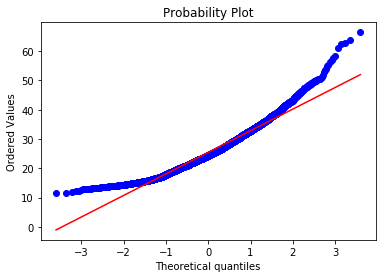

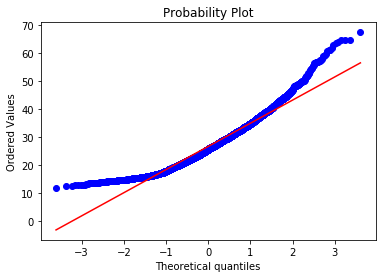

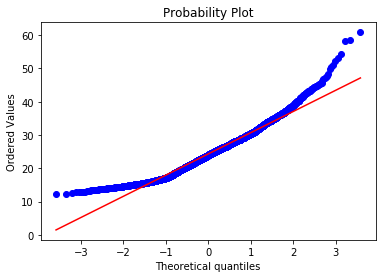

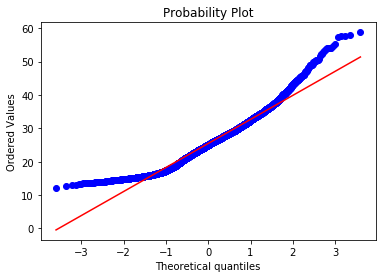

In [67]:
# Shapiro-Wilk tests strongly suggests rejecting normality
# Review QQ plot as further confirmation

for desc, data_set in data_sets_dict.items():
    stats.probplot(data_set, plot=sns.mpl.pyplot)
    plt.show()

In [68]:
# Run test of skew and kurtosis to estimate probability that
# samples come from normal distribution

# Each test statistic should be around 1 for a normal distribution

for desc, data_set in data_sets_dict.items():
    skew = stats.skewtest(data_set)
    kurtosis = stats.kurtosistest(data_set)
    print("{}".format(desc))
    print("Skew Normal: test-statistic {} (p-value: {})".format(skew[0], skew[1]))
    print("Kurtosis Normal: test-statistic {} (p-value: {})".format(kurtosis[0], kurtosis[1]))
    print("\n")


Female_1999-2000
Skew Normal: test-statistic 20.571631662657577 (p-value: 4.927986760533137e-94)
Kurtosis Normal: test-statistic 10.1188081422135 (p-value: 4.559336209628538e-24)


Female_2015-2016
Skew Normal: test-statistic 20.900167243676325 (p-value: 5.335773009138185e-97)
Kurtosis Normal: test-statistic 9.423718396640359 (p-value: 4.353899483161003e-21)


Male_1999-2000
Skew Normal: test-statistic 16.81603901930796 (p-value: 1.861991521922207e-63)
Kurtosis Normal: test-statistic 8.305987561460359 (p-value: 9.899260586767209e-17)


Male_2015-2016
Skew Normal: test-statistic 17.98743065009876 (p-value: 2.4443132904141806e-72)
Kurtosis Normal: test-statistic 8.117880680451018 (p-value: 4.743948568300685e-16)




In [69]:
# Transform data and review to see if that improves normality

In [80]:
print("Tests of normality on log-transformed data\n")
for desc, data_set in data_sets_dict.items():
    # transform data set
    data_set = np.log(data_set)
    
    shapiro_wilk = stats.shapiro(data_set)
    skew = stats.skewtest(data_set)
    kurtosis = stats.kurtosistest(data_set)

    print("{}".format(desc))
    print("Shapiro-Wilk Normal: test-statistic {} (p-value: {})".format(shapiro_wilk[0], shapiro_wilk[1]))
    print("Skew Normal: test-statistic {} (p-value: {})".format(skew[0], skew[1]))
    print("Kurtosis Normal: test-statistic {} (p-value: {})".format(kurtosis[0], kurtosis[1]))
    print("\n")


Tests of normality on log-transformed data

Female_1999-2000
Shapiro-Wilk Normal: test-statistic 0.9943130612373352 (p-value: 4.8010870452863674e-12)
Skew Normal: test-statistic 2.731171977633059 (p-value: 0.006310952982816379)
Kurtosis Normal: test-statistic -6.481219400589095 (p-value: 9.098425158513842e-11)


Female_2015-2016
Shapiro-Wilk Normal: test-statistic 0.9901424050331116 (p-value: 4.1192919525760935e-17)
Skew Normal: test-statistic 2.7590566631249844 (p-value: 0.005796848269744585)
Kurtosis Normal: test-statistic -10.04691173156596 (p-value: 9.47915550112779e-24)


Male_1999-2000
Shapiro-Wilk Normal: test-statistic 0.9890381097793579 (p-value: 2.3131262105820615e-17)
Skew Normal: test-statistic 0.35255098671671065 (p-value: 0.7244250878495166)
Kurtosis Normal: test-statistic -8.65958021825977 (p-value: 4.735047281847304e-18)


Male_2015-2016
Shapiro-Wilk Normal: test-statistic 0.9856733083724976 (p-value: 1.8802912306994232e-20)
Skew Normal: test-statistic 0.380231423348551

In [81]:
# The log transform normalizes the skew of the male data
# but does not affect other measures or the female data

In [82]:
print("Tests of normality on data transformed by taking the square root\n")
for desc, data_set in data_sets_dict.items():
    # transform data set
    data_set = np.sqrt(data_set)
    
    shapiro_wilk = stats.shapiro(data_set)
    skew = stats.skewtest(data_set)
    kurtosis = stats.kurtosistest(data_set)

    print("{}".format(desc))
    print("Shapiro-Wilk Normal: test-statistic {} (p-value: {})".format(shapiro_wilk[0], shapiro_wilk[1]))
    print("Skew Normal: test-statistic {} (p-value: {})".format(skew[0], skew[1]))
    print("Kurtosis Normal: test-statistic {} (p-value: {})".format(kurtosis[0], kurtosis[1]))
    print("\n")

Tests of normality on data transformed by taking the square root

Female_1999-2000
Shapiro-Wilk Normal: test-statistic 0.9830162525177002 (p-value: 2.017334429171244e-22)
Skew Normal: test-statistic 11.962600568956198 (p-value: 5.578698467003361e-33)
Kurtosis Normal: test-statistic 1.1236025721595246 (p-value: 0.2611816644446796)


Female_2015-2016
Shapiro-Wilk Normal: test-statistic 0.9791642427444458 (p-value: 4.1326270713371752e-25)
Skew Normal: test-statistic 12.077307521056422 (p-value: 1.3920365884269773e-33)
Kurtosis Normal: test-statistic -0.560818098576471 (p-value: 0.5749215474162591)


Male_1999-2000
Shapiro-Wilk Normal: test-statistic 0.9840906262397766 (p-value: 3.722967877071418e-21)
Skew Normal: test-statistic 8.516446950504161 (p-value: 1.6452296667065877e-17)
Kurtosis Normal: test-statistic -0.839589806398156 (p-value: 0.40113841661710636)


Male_2015-2016
Shapiro-Wilk Normal: test-statistic 0.9805152416229248 (p-value: 7.802956112843031e-24)
Skew Normal: test-statisti

In [84]:
# The square root transform somewhat normalizes the kurtosis of each gender
# in each year, but does not affect th eother measures

In [62]:
# The t-test can still be run on skewed data if the sample size is large
# Examine sample sizes

for desc, data_set in data_sets_dict.items():
    print("{} sample size: {}".format(desc, len(data_set)))

Female_1999-2000 sample size: 4337
Female_2015-2016 sample size: 4470
Male_1999-2000 sample size: 4125
Male_2015-2016 sample size: 4286


In [85]:
# Sample size is quite large, and seems to support moving forward 
# with running t-test

In [86]:
# Run t-test and store results for each gender

t_test_ind_female = stats.ttest_ind(a, b, equal_var=False, nan_policy="omit")
t_test_ind_male = stats.ttest_ind(c, d, equal_var=False, nan_policy="omit")

In [87]:
print("Female BMI Y2016 vs Y2000\nT-Statistic: {}\nP-Value: {}".format(
t_test_ind_female[0], t_test_ind_female[1]))

Female BMI Y2016 vs Y2000
T-Statistic: 6.358118372718017
P-Value: 0.0000000002


In [89]:
print("Male BMI Y2016 vs Y2000\nT-Statistic: {}\nP-Value: {}".format(
t_test_ind_male[0], t_test_ind_male[1]))

Male BMI Y2016 vs Y2000
T-Statistic: 7.720437280316082
P-Value: 1.2934349060308005e-14


In [90]:
# Results:
# * For both female and male respondents,
#   the difference in mean BMI appears to be significant
#   between the Y2000 and Y2016 surveys. This implies
#   BMI's among the general population has (statistically) significantly 
#   increased in this interval.
# * However, the sample size is large enough to detect small changes
#   in the BMI and report those as significant.